# Display a saved image

## Objectives

* use functions and modules
* know how to load and display an image, and use a colormap
* display the size of an image
* convert an image to grayscale
* use the `:` operator
* understand that an image is also a 2D signal

## Modules

The use of the function `ccc` available in the submodule `bbb` of the module `aaa` writes `aaa.bbb.ccc`.
I am sure you agree this is a bit long to write, that is why we usually rename the submodule to something shorter.
Thus, the following instructions rename `skimage.io` to `io`, and `matplotlib.pyplot` to `plt`:

In [4]:
import skimage.io as io
import matplotlib.pyplot as plt

The three modules used in this course are:
* [Numpy](http://www.numpy.org/) (scientific programming),
* [Scikit-image](https://scikit-image.org/) (image processing),
* [Matplotlib](https://matplotlib.org/) (display).

Refer to the documentation on these websites to get the syntax of the functions.

## Display the color image

Now you can load the image 4.2.03.tiff (load it directly from the website):

In [5]:
f = io.imread("http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03")

and display it (add a title):

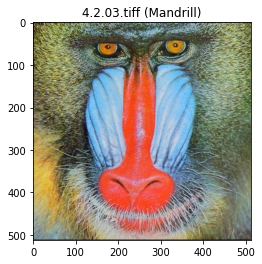

In [6]:
plt.imshow(f)
plt.title('4.2.03.tiff (Mandrill)')
plt.show()

The function `plt.show()` is the correct way to show the image.

The image dimensions can be read on the displayed image: a little more than 500 pixels per side, and 3 bands since the image is in color.
A more precise alternative is to use the `shape` function:

In [7]:
print(f.shape)

(512, 512, 3)


So the image if of size 512 × 512, with 3 bands.

## Conversion to grayscale

We need to import a new module (I am doing this at this point, but it is recommended to import all modules at the beginning of the notebook).

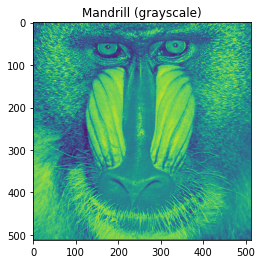

In [8]:
import skimage.color as color

g = color.rgb2gray(f)
plt.imshow(g)
plt.title('Mandrill (grayscale)')
plt.show()

What's that weird grayscale image? It's rather green... 

This actually _is_ a grayscale image (the image has only one band).
But the default colormap provided with `imshow` is a gradient of blue and green.
To display it in real gray levels, you must specify the option `cmap` in `imshow`.
A large number of palettes are available (see [catalog](https://matplotlib.org/stable/gallery/color/colormap_reference.html));
here we choose the classic `gray`:

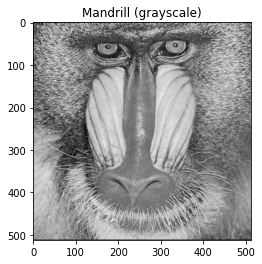

In [9]:
plt.imshow(g, cmap="gray")
plt.title('Mandrill (grayscale)')
plt.show()


The grayscale image has intensities in this range:

In [10]:
print(f"Min : {g.min()}")
print(f"Max : {g.max()}")

Min : 0.0
Max : 0.9116803921568628


The range of colors can also be redefined by specifying the intensities corresponding to black (`vmin`) and white (`vmax`):

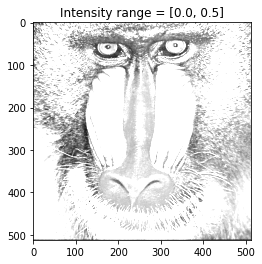

In [11]:
plt.imshow(g, vmin=0.0, vmax=0.5, cmap="gray");
plt.title("Intensity range = [0.0, 0.5]");
plt.show()

## Extraction of pixels

The syntax `g[a:b,c:d]` extract pixels located between rows `a` and `b`--1 and columns `c` and `d`--1.
If `a` or `c` is not given, then it is considered to be $0$.
If `b` or `d` is not given, then it is considered to be the maximal index in the dimension.

Then we have the instensity of top-left pixel:

In [12]:
g[0,0]

0.5775650980392157

The intensities of the five first pixels of the second row:

In [17]:
g[0,0:5]

array([0.5775651 , 0.22117804, 0.18596353, 0.35588902, 0.54424235])

And the intensities of all the pixels in the third row:

In [14]:
g[2,:]

array([0.29887137, 0.45405412, 0.17520392, 0.18225216, 0.39513529,
       0.23370078, 0.23346275, 0.18306275, 0.44279098, 0.42749882,
       0.19147922, 0.23552588, 0.28236667, 0.14554353, 0.10365373,
       0.20003569, 0.47681922, 0.41969843, 0.38021059, 0.22593216,
       0.28821765, 0.20411412, 0.16150392, 0.25885922, 0.3675949 ,
       0.70087843, 0.80062784, 0.69879137, 0.3542451 , 0.18072471,
       0.37092039, 0.66425961, 0.62859882, 0.32563176, 0.48865843,
       0.44584078, 0.43163216, 0.41797137, 0.4346651 , 0.50814902,
       0.29834   , 0.53164941, 0.52597647, 0.48358314, 0.55389647,
       0.58781529, 0.5523349 , 0.56919608, 0.32072275, 0.47438745,
       0.57285569, 0.25036235, 0.34582863, 0.3136149 , 0.38447255,
       0.37164275, 0.33711451, 0.67537804, 0.59824706, 0.62892549,
       0.54611451, 0.59752706, 0.40229412, 0.2953298 , 0.64953529,
       0.65788039, 0.24202118, 0.36884667, 0.49252118, 0.79315843,
       0.70304157, 0.46462706, 0.42678275, 0.25671647, 0.19072

## Brightness profile

I choose a horizontal cut on the 200<sup>th</sup> line of the image:

In [15]:
cut = 200          # Cut location
profil = g[cut,:]  # Extract all the pixels of the row 'cut' in the image g

Now we can display the brightness profile...

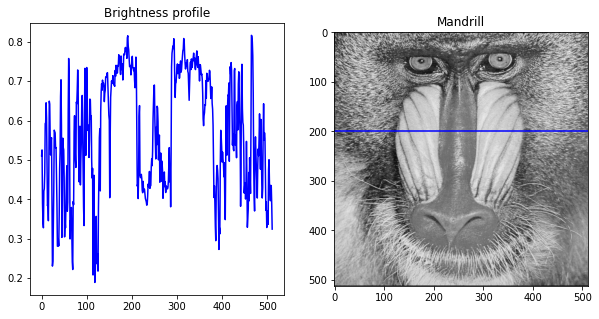

In [60]:
plt.figure(figsize=(10,5))           # New figure with specific display size

plt.subplot(1,2,1)                   # Plot on the left
plt.plot(profil,'b')                 # Brightness profile
plt.title("Brightness profile")      # Title

plt.subplot(1,2,2)                   # Image on the right
plt.imshow(g, cmap="gray")           # Image
plt.plot((0,511), (cut,cut), 'b')    # Cut line in blue
plt.title("Mandrill")                # Title

plt.show()

Do you see on the profile the Mandrill's nose and the protruding ridges on its sides?